In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
# delete rows of data if they have any null values
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [33]:

# split data into training set and testing set, for testing set we need data that the algorithm hasn't seen yet to see accuracy of algorithm

from sklearn.model_selection import train_test_split

# x = all data except for the "answer" data, (data to be placed into algorithm)
# y = the "answers"

x = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']


In [34]:
# split the data, with 20% of the data as testing data, and 80% as training data, (20% is the standard value)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


In [35]:

# now combine the 2 training sets to make a complete set for training purposes only
train_data = x_train.join(y_train)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

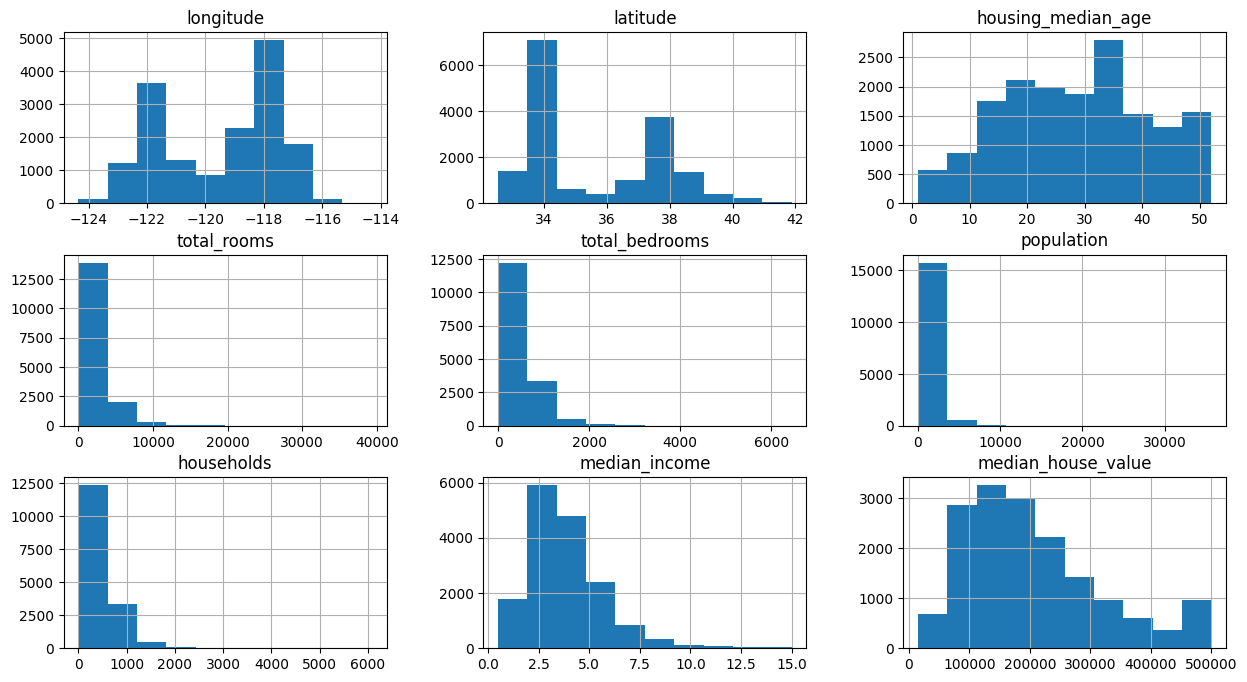

In [36]:
# quick graphical overview of data
train_data.hist(figsize=(15, 8))


In [37]:

# shows you the correlation values between every variable in the dataset
train_data
cleaned_train_data = train_data.drop('ocean_proximity', axis=1)

cleaned_train_data.corr()



,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925787,-0.117847,0.048780,0.072454,0.101978,0.058698,-0.014432,-0.048411
latitude,-0.925787,1.000000,0.020664,-0.040165,-0.070356,-0.110564,-0.073900,-0.079452,-0.140397
housing_median_age,-0.117847,0.020664,1.000000,-0.359966,-0.320007,-0.294869,-0.302510,-0.117776,0.103704
total_rooms,0.048780,-0.040165,-0.359966,1.000000,0.931053,0.854734,0.918585,0.192796,0.129949
total_bedrooms,0.072454,-0.070356,-0.320007,0.931053,1.000000,0.874278,0.979259,-0.011303,0.045872
population,0.101978,-0.110564,-0.294869,0.854734,0.874278,1.000000,0.904008,0.002389,-0.028582
households,0.058698,-0.073900,-0.302510,0.918585,0.979259,0.904008,1.000000,0.009698,0.060360
median_income,-0.014432,-0.079452,-0.117776,0.192796,-0.011303,0.002389,0.009698,1.000000,0.689251
median_house_value,-0.048411,-0.140397,0.103704,0.129949,0.045872,-0.028582,0.060360,0.689251,1.000000


<Axes: >

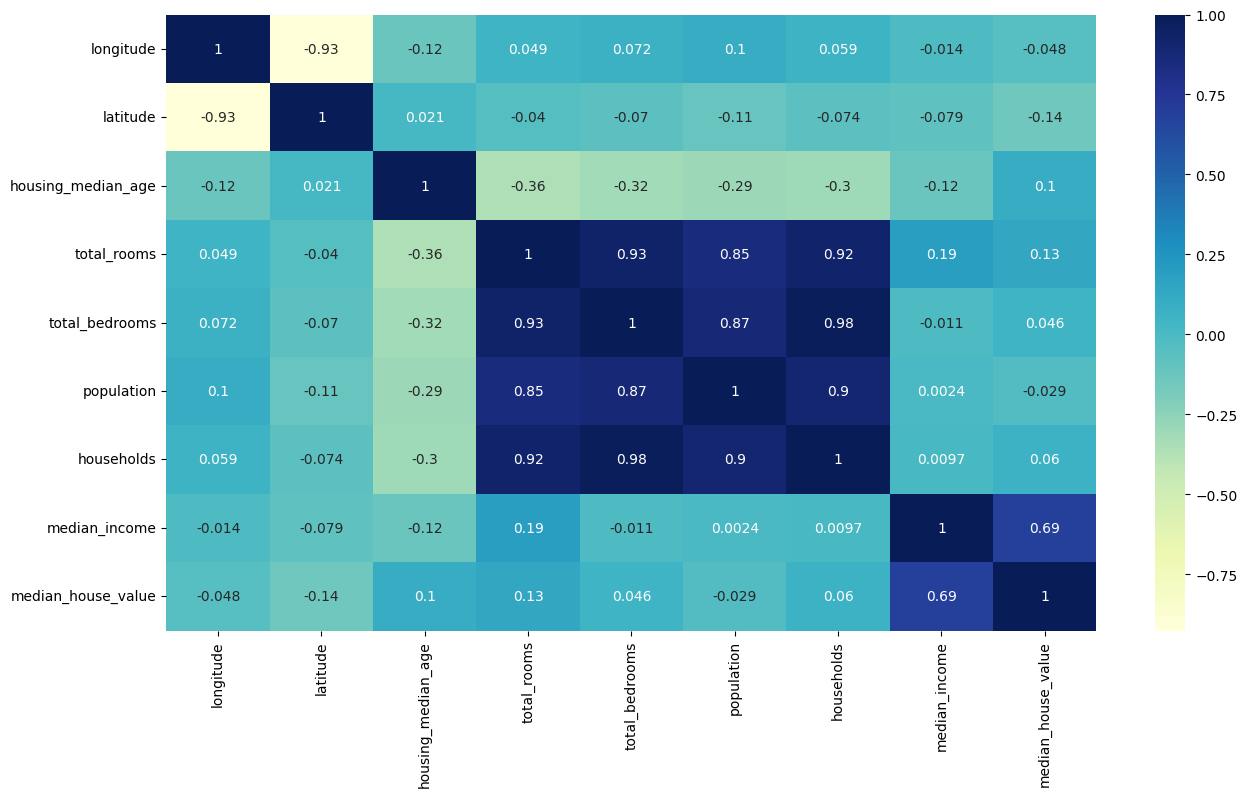

In [38]:

# visualize the correlation vals to make it easier to see

plt.figure(figsize=(15, 8))

# annotaions = true (shows num values), color_map = "Yellow Green Blue"
sns.heatmap(cleaned_train_data.corr(), annot=True, cmap="YlGnBu")


In [ ]:

# with heat map we can see that the median_income highly correlates with house value
# we also see that latitude, median_age and total_bedrooms slightly correlate with house value



In [39]:

# smooth out the curves for some of the variables, +1 (add 1 so that log doesn't complain about 0 values)
# this makes the graphs look closer to a bell curve

cleaned_train_data['total_rooms'] = np.log(cleaned_train_data['total_rooms']+1)
cleaned_train_data['total_bedrooms'] = np.log(cleaned_train_data['total_bedrooms']+1)
cleaned_train_data['population'] = np.log(cleaned_train_data['population']+1)
cleaned_train_data['households'] = np.log(cleaned_train_data['total_rooms']+1)



array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

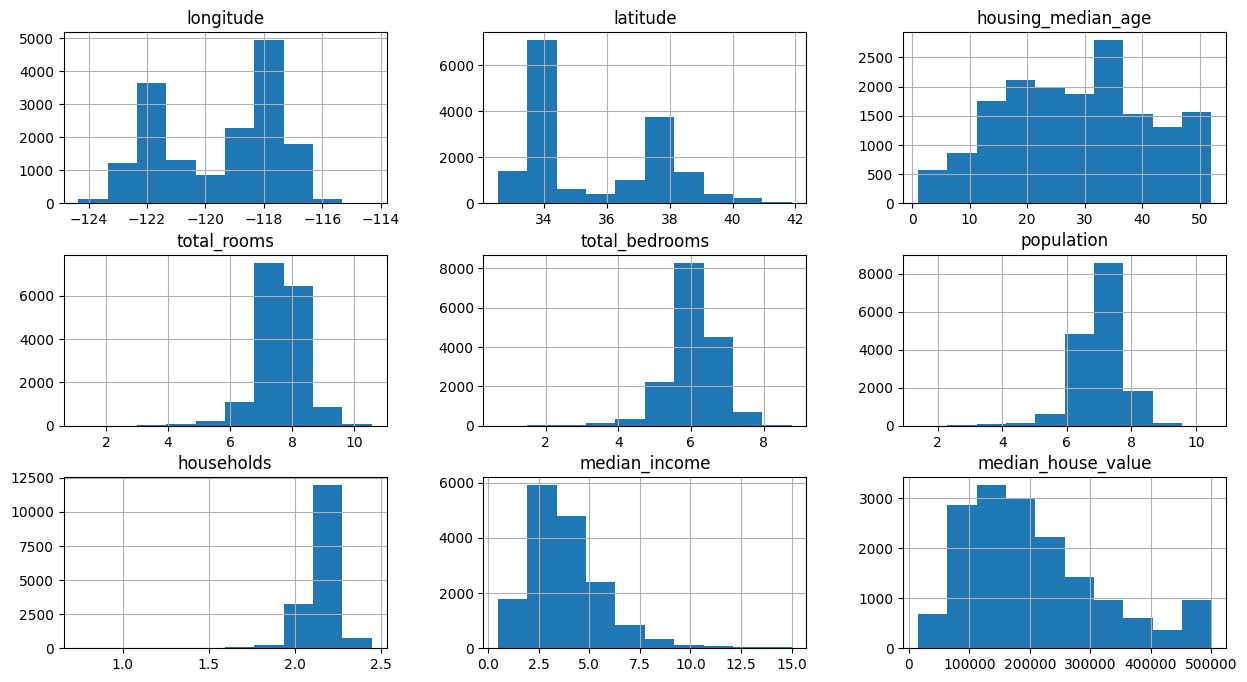

In [40]:

# we can see how some of the graphs look more "bell-like" than before
cleaned_train_data.hist(figsize=(15,8))



In [41]:


# now lets focus on the ocean_proximity variable and make it usable for the algo

train_data.ocean_proximity.value_counts()



ocean_proximity
<1H OCEAN     7192
INLAND        5173
NEAR OCEAN    2137
NEAR BAY      1839
ISLAND           5
Name: count, dtype: int64

In [50]:

# give each value its own column, and make the columns be either 1 or 0, (yes or no)
ocean_prox_sep = pd.get_dummies(train_data.ocean_proximity, dtype=int)

ocean_prox_sep

# add these columns to the training data

cleaned_train_data = cleaned_train_data.join(ocean_prox_sep)



<Axes: >

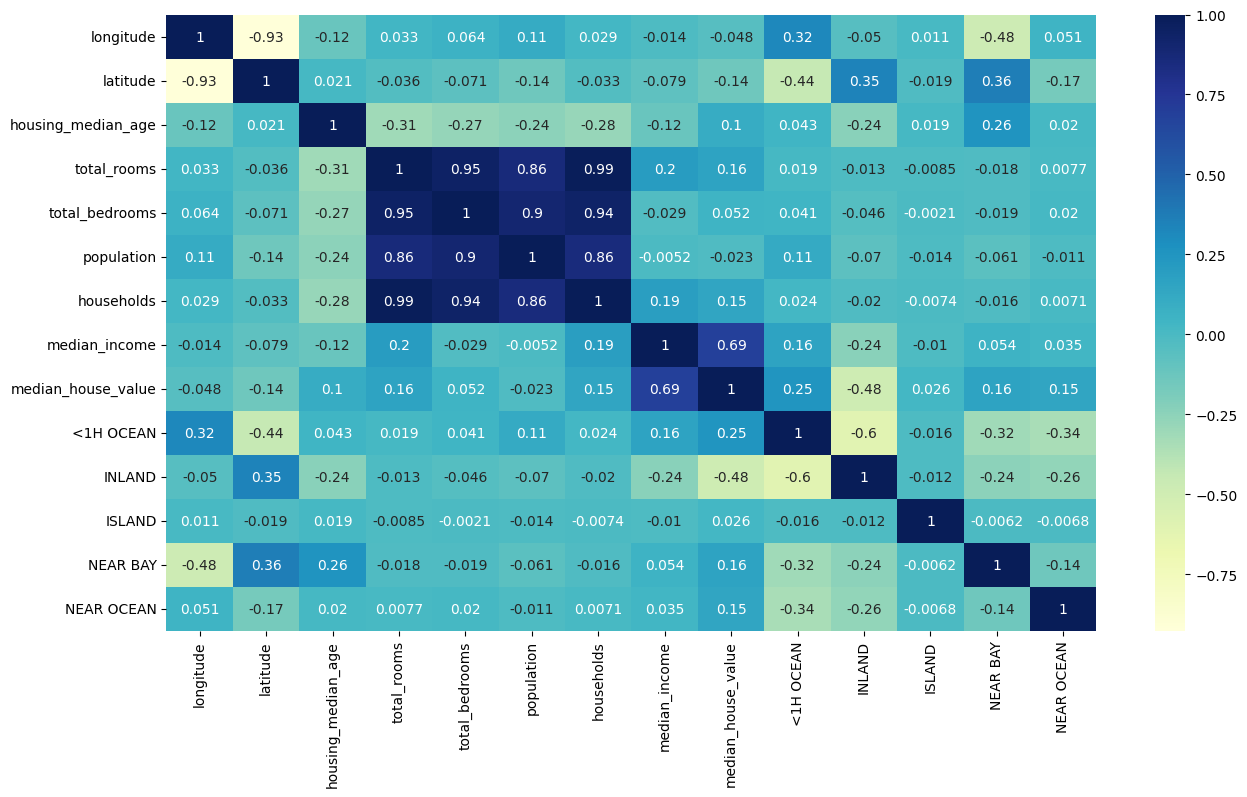

In [53]:
# now lets see the heat map with these new columns

plt.figure(figsize=(15, 8))
sns.heatmap(cleaned_train_data.corr(), annot=True, cmap="YlGnBu")


<Axes: xlabel='latitude', ylabel='longitude'>

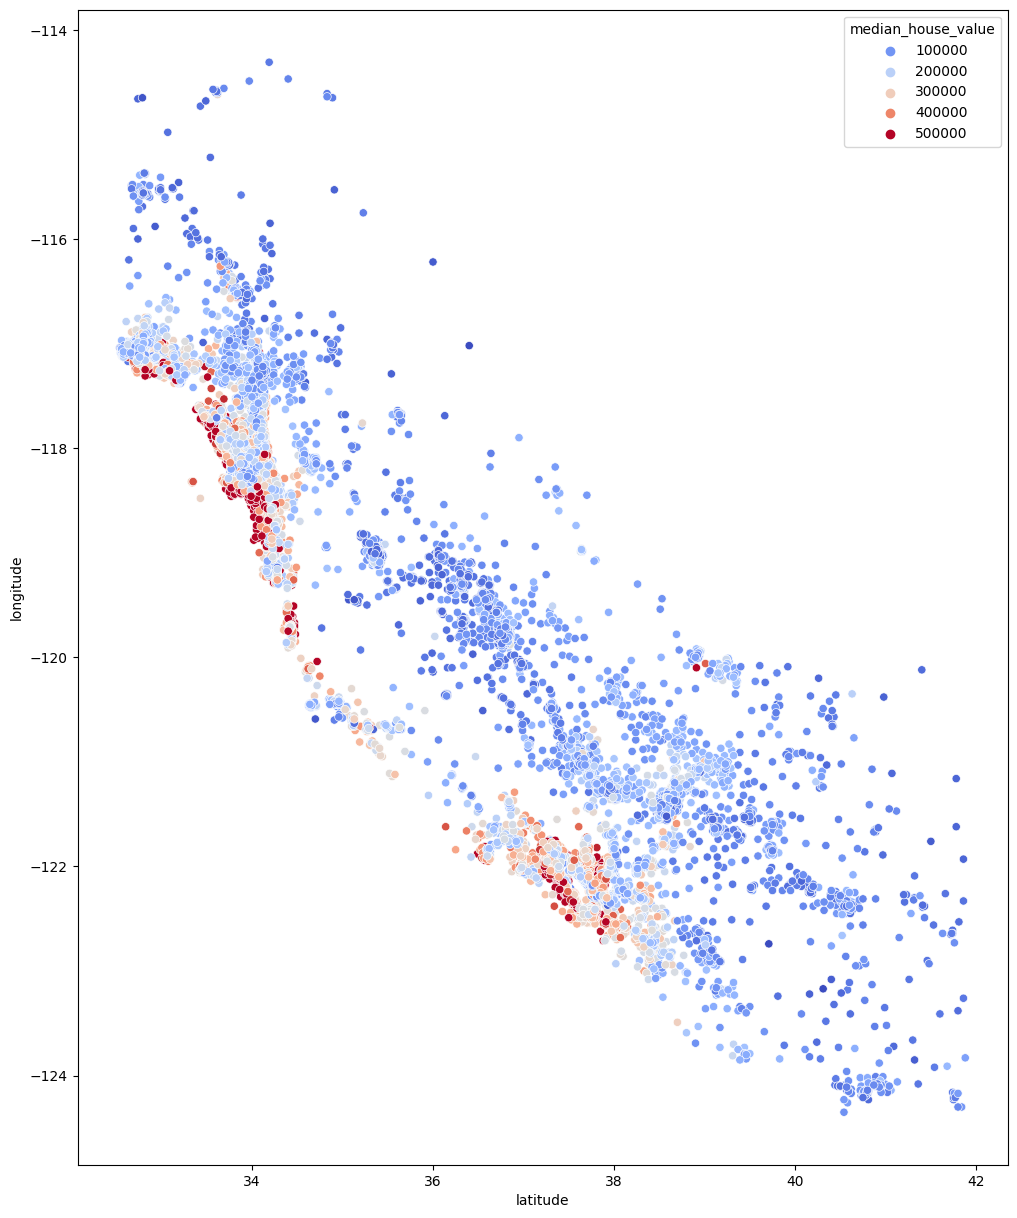

In [59]:
plt.figure(figsize=(12, 15))

# lets now visualize the latitude and longitude with median house price:
sns.scatterplot(x = "latitude", y = "longitude", data=cleaned_train_data, hue="median_house_value", palette="coolwarm")

<Axes: >

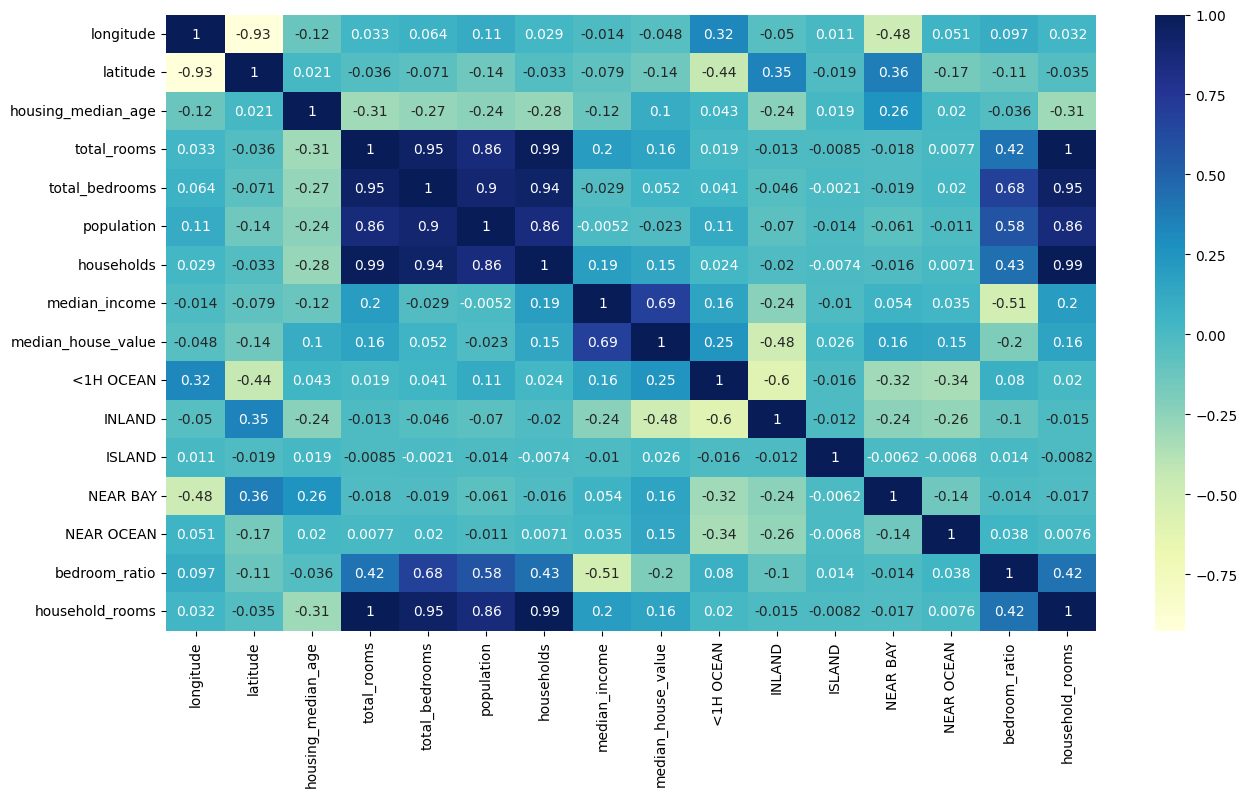

In [61]:

# create a new column of the ratio of bedrooms to rooms
cleaned_train_data['bedroom_ratio'] = cleaned_train_data['total_bedrooms'] / cleaned_train_data['total_rooms']

# create new column to show num of rooms per house
cleaned_train_data['household_rooms'] = cleaned_train_data['total_rooms'] / cleaned_train_data['households']


# now let see the correlation heatmap

plt.figure(figsize=(15, 8))
sns.heatmap(cleaned_train_data.corr(), annot=True, cmap="YlGnBu")







In [ ]:

# see how bedroom_total, room_total, and households aren't very interesting variables
# but by creating new columns and manipulating the data, we see that 
# certain combinations of the data create very interesting correlations



In [73]:

# now lets train some models

# Linear Regression: most simple model, not fully machine learning but instead just a statistical model

from sklearn.linear_model import LinearRegression
# lets seperate the "answers"
x_train = cleaned_train_data.drop(['median_house_value'], axis=1)
y_train = cleaned_train_data['median_house_value']


reg = LinearRegression()
reg.fit(x_train, y_train)






LinearRegression()

In [71]:

test_data = x_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms']+1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms']+1)
test_data['population'] = np.log(test_data['population']+1)
test_data['households'] = np.log(test_data['total_rooms']+1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'], axis=1)

test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms']
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households']

x_test = cleaned_train_data.drop(['median_house_value'], axis=1)
y_test = cleaned_train_data['median_house_value']



AttributeError: 'DataFrame' object has no attribute 'ocean_proximity'

In [74]:

#
reg.score(x_test, y_test)


0.6689018825078811

In [ ]:
# we can see that the linear regression model only has a score of .67

In [75]:

from sklearn.ensemble import RandomForestRegressor


forest = RandomForestRegressor()

forest.fit(x_train, y_train)

RandomForestRegressor()

In [76]:
forest.score(x_test, y_test)

0.9750039919342562

In [88]:
# a much better score of .975 with random forest regression


#this means that our model has a 97.5% accuracy rate


# to use this model in general cases, all we have to do is inpput the x values as a data-frame

longitude = [117.9988]
latitude = [33.65]
housing_median_age = [50] # age of house
total_rooms = [7]
total_bedrooms = [4]
population = [5]
households = [1]
median_income = [10] # in tens of thousands of $
one_hour_ocean = [0]
inland = [0]
island = [0]
near_bay = [0]
near_ocean = [1]
bedroom_ratio = [.57]
household_rooms = [7]


# Create a DataFrame using a dictionary
data = {'longitude': longitude, 
        'latitude': latitude, 
        'housing_median_age': housing_median_age,
        'total_rooms': total_rooms,
        'total_bedrooms': total_bedrooms, 
        'population': population,
        'households': households,
        'median_income': median_income, 
        '<1H OCEAN': one_hour_ocean,
        'INLAND': inland,
        'ISLAND': island,
        'NEAR BAY': near_bay,
        'NEAR OCEAN': near_ocean,
        'bedroom_ratio': bedroom_ratio, 
        'household_rooms': household_rooms}


input = pd.DataFrame(data)

predictions = forest.predict(input) # for example

predictins







,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN,bedroom_ratio,household_rooms
1615,-122.11,37.87,33.0,8.131237,6.216606,7.209340,2.211701,6.5814,0,0,0,1,0,0.764534,3.676463
13227,-117.69,34.01,30.0,7.862882,6.352629,7.682943,2.181872,2.3000,0,1,0,0,0,0.807926,3.603732
7687,-118.10,33.95,34.0,8.198639,6.661855,7.683404,2.219056,3.7308,1,0,0,0,0,0.812556,3.694653
12680,-121.39,38.55,25.0,7.683404,6.068426,6.960348,2.161414,3.5278,0,1,0,0,0,0.789810,3.554805
17657,-121.89,37.28,35.0,7.791110,5.929589,6.896694,2.173741,6.0936,1,0,0,0,0,0.761071,3.584194
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20219,-119.26,34.28,41.0,7.515345,5.743003,6.527958,2.141870,4.8977,0,0,0,0,1,0.764170,3.508778
20514,-121.52,38.58,24.0,6.844815,5.620401,6.232448,2.059853,1.6420,0,1,0,0,0,0.821118,3.322963
4727,-118.37,34.06,52.0,7.784473,6.228511,6.778785,2.172986,4.0217,1,0,0,0,0,0.800120,3.582386
9211,-120.31,37.11,38.0,7.436617,5.710427,6.893656,2.132581,2.4054,0,1,0,0,0,0.767880,3.487143
